### 추세 변동

In [6]:
import numpy as np
import pandas as pd
# Datetimeindex
dates= pd.date_range('2020-01-01',periods=48,freq='M')
#additive model: trend + cycle + seasonality + irregular factor
timestamp= np.arange(len(dates))
trend_factor=timestamp*1.1
cycle_factor= 10*np.sin(np.linspace(0,3.14*2,48))
seasonal_factor=7*np.sin(np.linspace(0,3.14*8,48))
np.random.seed(2004)
irregular_factor=2*np.random.randn(len(dates))


df=pd.DataFrame({'timeseries':trend_factor+ cycle_factor+ seasonal_factor+irregular_factor,'trend':trend_factor,
                 'cycle':cycle_factor,
                 'seasonal':seasonal_factor,
                 'irregular': irregular_factor},
                index=dates)

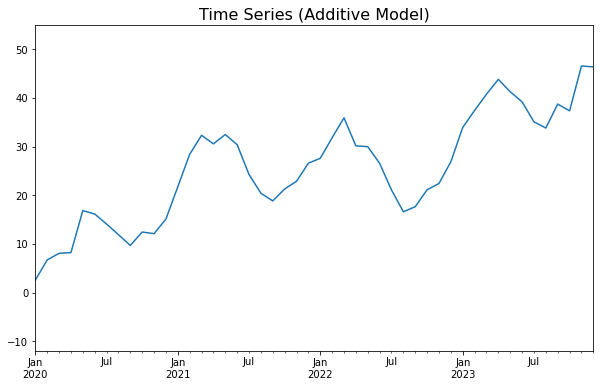

In [7]:
# Time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])
df.timeseries.plot()
plt.title("Time Series (Additive Model)", fontsize=16)
plt.ylim(-12, 55)
plt.show()

### 순환변동

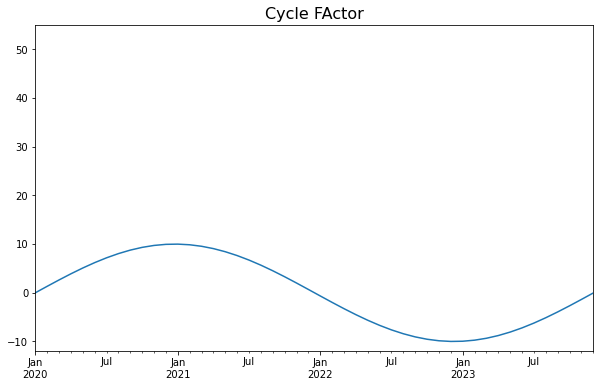

In [8]:
# 4년 주기
# -- Cycle variation
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
plt.figure(figsize=[10,6])
df.cycle.plot()
plt.title("Cycle FActor", fontsize=16)
plt.ylim(-12, 55)
plt.show()


### 계절 변동

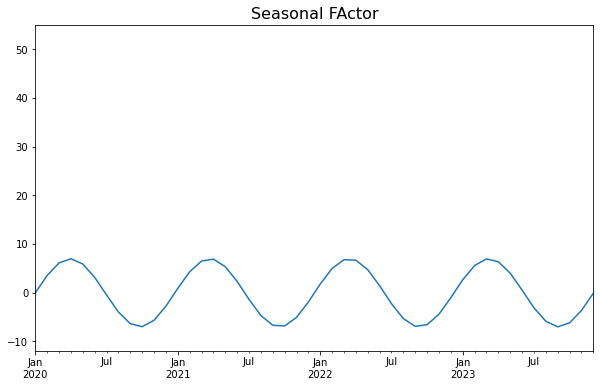

In [9]:

# -- Seasonal factor
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
plt.figure(figsize=[10,6])
df.seasonal.plot()
plt.title("Seasonal FActor", fontsize=16)
plt.ylim(-12, 55)
plt.show()

### 단순 평활화 기법

### 지수 평활법


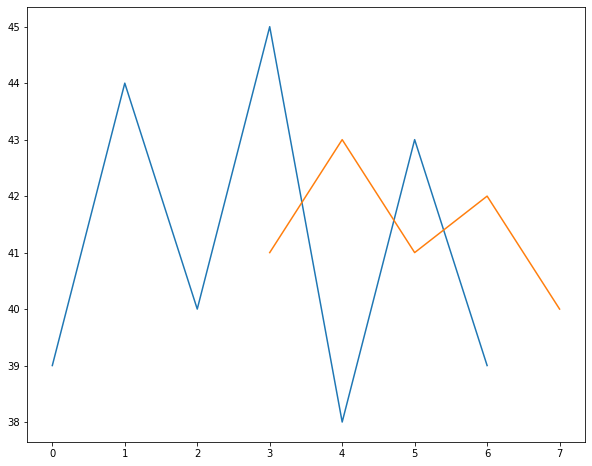

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# 2020년 8월 부터 일요일 8개를 조회
# start : 시작일, periods : 생성할 날짜의 개수, freq : 생성할 날짜의 주기
pd.date_range(start="2020-08", periods=8, freq="W")

df = pd.DataFrame({
"week":pd.date_range(start="2020-08", periods=8, freq="W"),
"sales":[39,44,40,45,38,43,39,np.nan],
"3MA":[0]*8
})
# 0~2주차 평균을 3주차에 shift해서 적용
df["3MA"] = df[["sales"]].rolling(3).mean().shift(1)
df

plt.figure(figsize=(10,8))
df.sales.plot()
df["3MA"].plot()
plt.show()


Text(0.5, 1.0, 'Close Price for Apple')

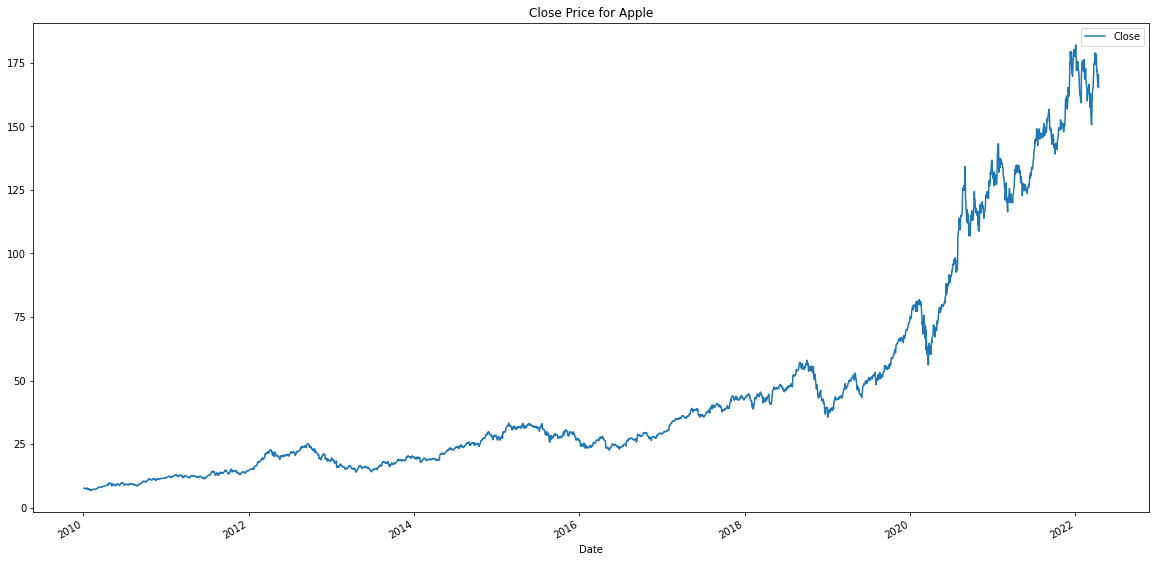

In [24]:
### 애플 주가 분석

import FinanceDataReader as fdr
# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기
df_apple = fdr.DataReader('AAPL', start = '2010')
# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)
df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')


<AxesSubplot:xlabel='Date'>

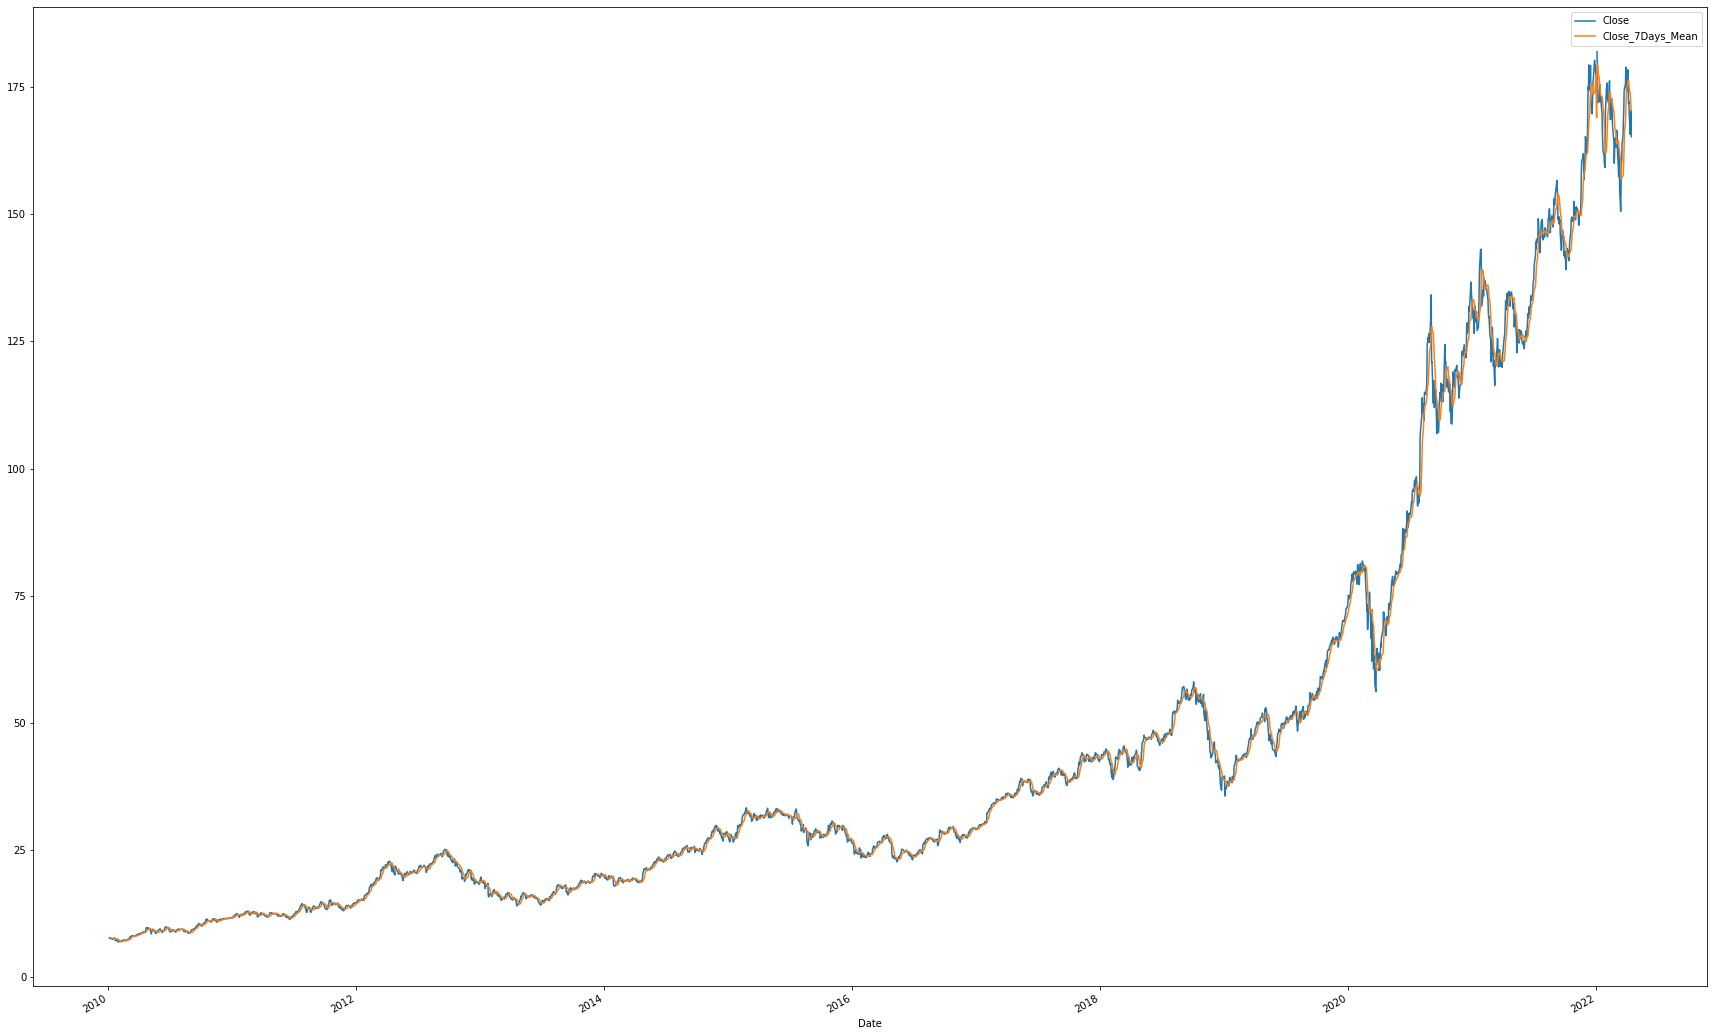

In [25]:
last_day = datetime(2022, 1, 2)
df_apple.loc[last_day, "Close"] = np.nan
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1)
df_apple[['Close', 'Close_7Days_Mean']].plot(figsize=(30,20))
# 7일전 평균값 그래프 + 종가 그래프

Text(0.5, 1.0, 'Monthly Mean Close Price for Appl')

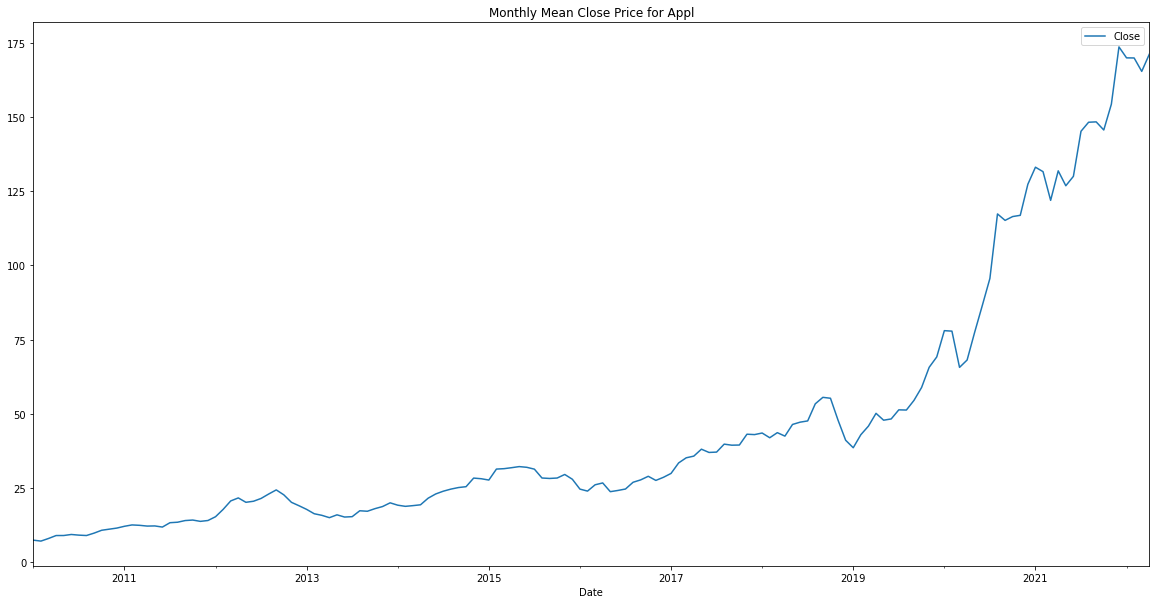

In [26]:
# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly = df_apple.resample(rule='M').mean()
# 마지막 컬럼(Close_7Days_Mean) 제외
df_apple_monthly = df_apple_monthly.iloc[:,:-1]
# 월별 주가(종가)를 시각화
df_apple_monthly[['Close']].plot(figsize=(20,10))
plt.title('Monthly Mean Close Price for Appl')

In [41]:
df_apple_monthly[['Close_3Month_Mean']] =df_apple_monthly[['Close']].rolling(3).mean().shift(1)
df_apple_monthly

,Close,Open,High,Low,Volume,Change,Close_3Month_Mean
Date,,,,,,,
2010-01-31,7.416842,7.477895,7.544211,7.331579,7.986816e+08,-0.004632,NaN
2010-02-28,7.100000,7.075263,7.157895,7.011579,5.672258e+08,0.003458,NaN
2010-03-31,7.978261,7.957391,8.023478,7.903043,5.285148e+08,0.006078,NaN
2010-04-30,8.969048,8.964762,9.040476,8.860952,5.889176e+08,0.005195,7.498368
2010-05-31,8.979500,8.999000,9.128000,8.744500,9.045850e+08,-0.000415,8.015769
...,...,...,...,...,...,...,...
2021-12-31,173.552727,173.155000,175.632273,171.252727,1.092945e+08,0.003418,149.375238
2022-01-31,169.861500,170.201000,172.448000,167.639000,1.028565e+08,-0.000565,157.790750
2022-02-28,169.830000,169.634737,171.585263,167.580526,8.396368e+07,-0.002879,165.889981


### EMA(지수이동평균)

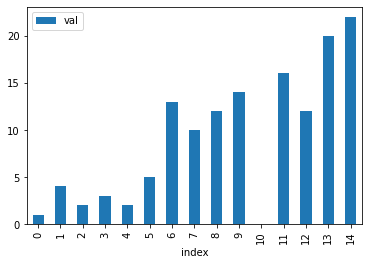

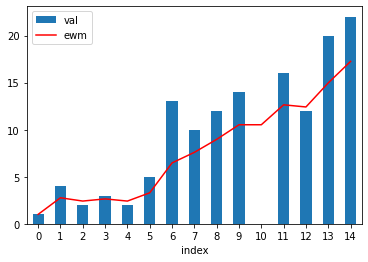

In [58]:
import pandas as pd
data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
#df['val'].plot.bar(rot=0, subplots=True)
df.plot(kind='bar',x='index',y='val')

df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) # val 열에 ewm 메서드 적용 후 df에 추가
ax = df.plot(kind='bar',x='index',y='val')
ax2 = df2.plot(kind='line',x='index',y='ewm',color='red',ax=ax) # ax2에 df2의 line chart 생성후 ax에 추가
plt.show()




# myEWMA는 지수이동평균값을 df.ewm(span=3).mean()과 같이 계산해주도록 정의한 메소드
df = pd.DataFrame({'week':pd.date_range(start='2020-08',periods=8,freq="W"),
'sales':[39,44,40,45,38,43,39,np.nan],
'3EMA':[0]*8})

#지수 이동 평균 계산할 함수 , data 지수 이동 평균 계산 데이터 , span 지수 이동 평균의 거리 (강의 자료에서 3주마다 지수 이동 평균이므로 3)

def myEWMA(data,span):
    ewma=[0]*len(data) #지수 이동평균을 계산해서 저장할 리스트
    molecule = 0 #지수 이동 평균의 분자
    denominator = 0 #지수 이동 평균의 분모
    alpha = 2.0 / (1.0 + span)
    for i in range(len(data)):
        molecule = (data[i] + (1.0-alpha)*molecule) # 분자 계산 data+(1-alpha)앞의 데이터
        denominator+=(1-alpha)**i # 분모계산 (1-alpha)의 i승
        print(f"index : {i}")
        print(f"molecule : {molecule}")
        print(f"denominator : {denominator}")
        ewma[i] = molecule/denominator
        print(f"ewma : {ewma[i]}")
        print("="*100)
    return ewma

<AxesSubplot:xlabel='Date'>

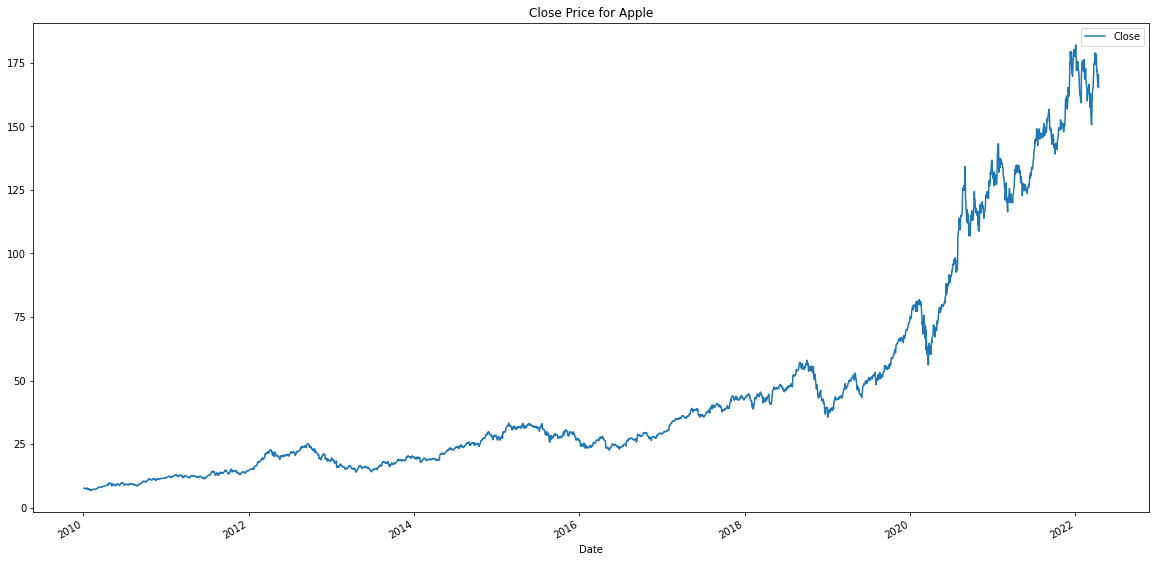

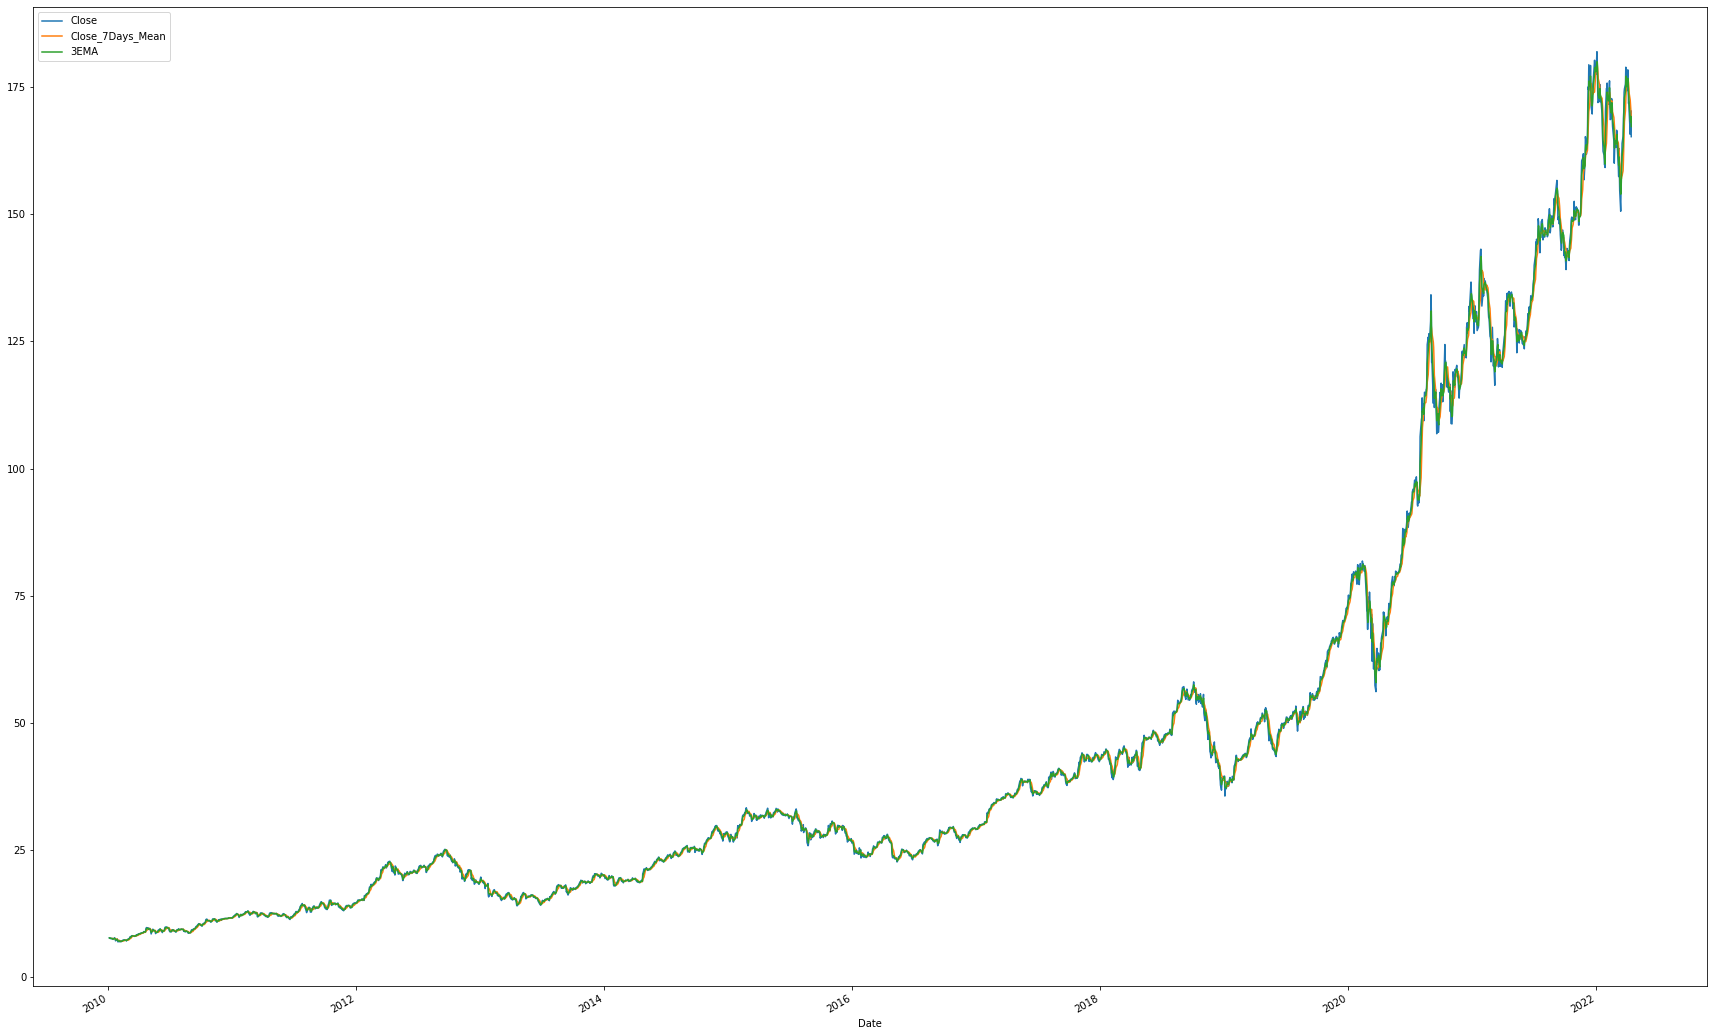

In [64]:
import FinanceDataReader as fdr
# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기
df_apple = fdr.DataReader('AAPL', start = '2010')
# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)
df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

df_apple[["Close"]].ewm(span=3).mean()
df_apple["3EMA"]=df_apple[["Close"]].ewm(span=3).mean()

df_apple[['Close', 'Close_7Days_Mean',"3EMA"]].plot(figsize=(30,20))


### 정상성, 차분

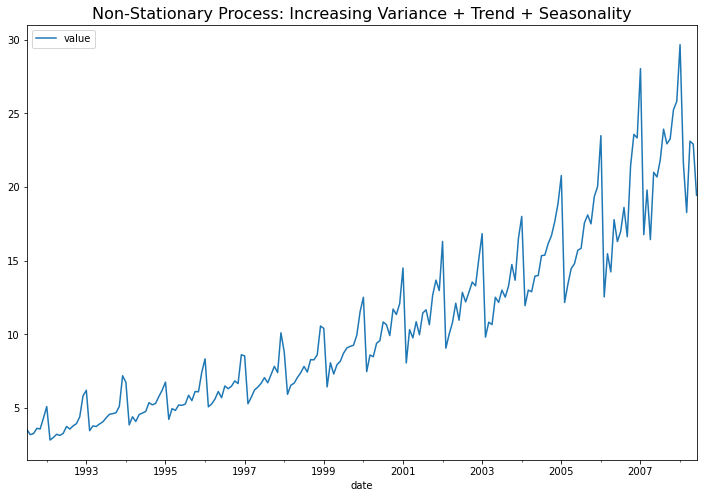

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## getting drug sales dataset
file_path= 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date') 
df.head(12)

df.plot(figsize=[12, 8]) 
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', 
fontsize=16) 
plt.show()

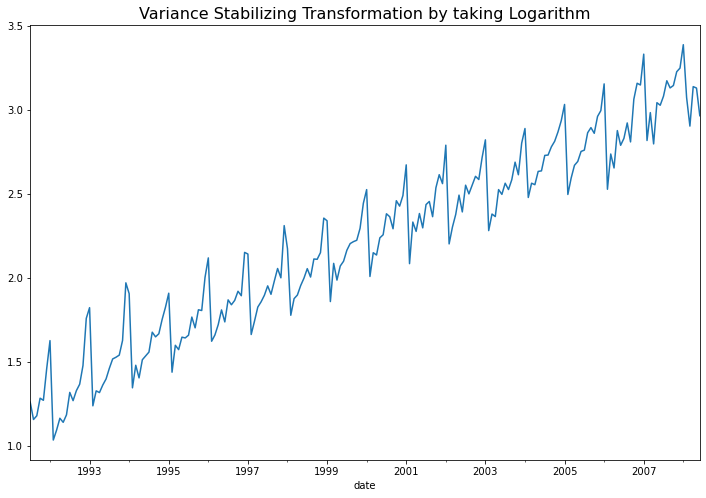

In [88]:
# 로그를 통한 분산 안정화
## Variance Stabilizing Transformation (VST) by Taking Logarithm
df_vst = np.log(df.value) 
df_vst.head()

df_vst.plot(figsize=(12, 8)) 
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16) 
plt.show()

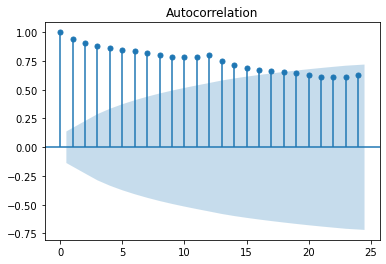

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, acf
plot_acf(df_vst) 
plt.show() # stationary

<AxesSubplot:xlabel='date'>

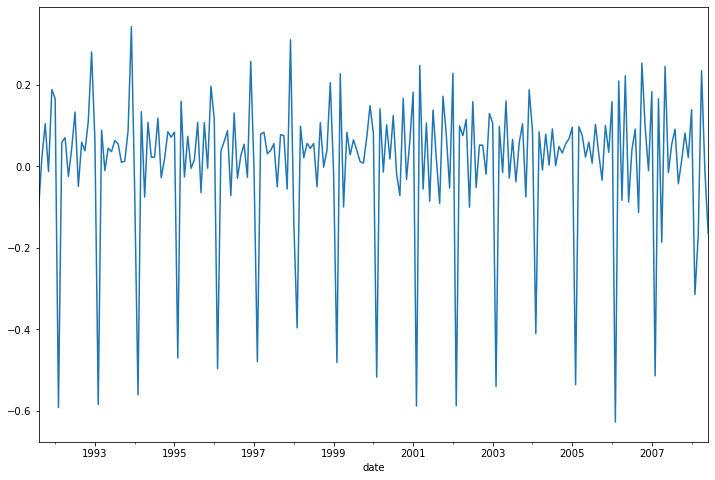

In [90]:
# 차분을 통한 추세 제거

## De-trend by Differencing
df_vst_diff1 = df_vst.diff(1).dropna() 
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
# plt.title("De-trend by 1st order Differencing", fontsize=16) 
# plt.show()

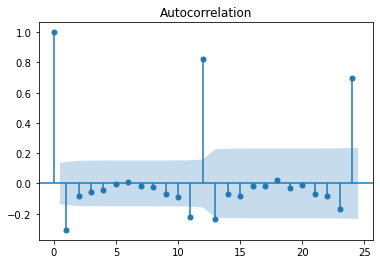

In [91]:
plot_acf(df_vst_diff1) 
plt.show() # stationary

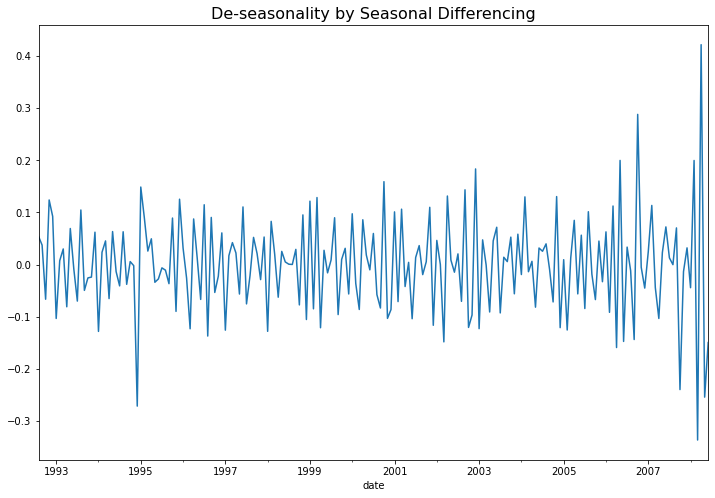

In [92]:
# 차분을 통한 계절성 제거

## Stationary Process: De-seasonality by Seasonal Differencing
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing", fontsize=16) 
plt.show()

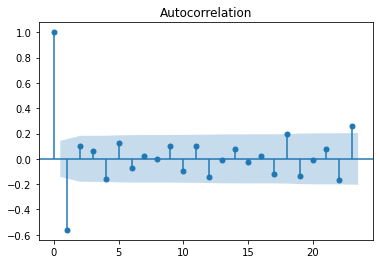

In [93]:
plot_acf(df_vst_diff1_diff12) 
plt.show() # stationary

### AR 자기회귀 모형

In [77]:
# ArmaProcess로 모형 생성하고 nobs 만큼 샘플 생성

def gen_arma_samples (ar,ma,nobs): 
    arma_model = ArmaProcess(ar=ar, ma=ma) # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples
# drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
def gen_random_walk_w_drift(nobs,drift): 
    init = np.random.normal(size=1, loc = 0) 
    e = np.random.normal(size=nobs, scale =1) 
    y = np.zeros(nobs) 
    y[0] = init
    for t in (1,nobs): 
        y[t] = drift + 1 * y[t-1] + e[t] 
        return y

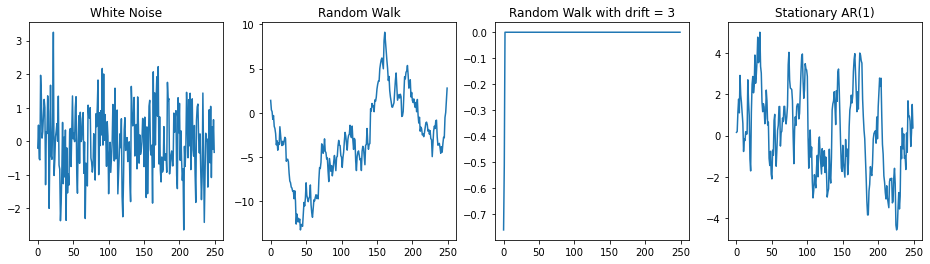

In [79]:
np.random.seed(12345)
white_noise= gen_arma_samples(ar = [1], ma = [1], nobs = 250) 
# y_t = epsilon_t
random_walk = gen_arma_samples(ar = [1,-1], ma = [1], nobs = 250) 
# (1 - L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(250, 2) 
# y_t = 2 + y_{t-1} + epsilon_t
stationary_ar_1 = gen_arma_samples(ar = [1,-0.9], ma = [1],nobs=250) 
# (1 - 0.9L) y_t = epsilon_t
fig,ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("White Noise")

ax[1].plot(random_walk)
ax[1].set_title("Random Walk")
ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with drift = 3")
ax[3].plot(stationary_ar_1)
ax[3].set_title("Stationary AR(1)")
fig.set_size_inches(16,4)

### MA(q) 모형 생성

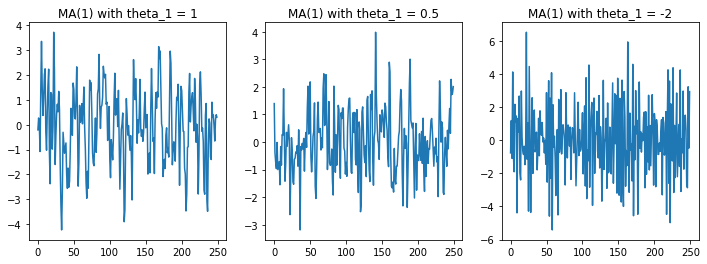

In [80]:
np.random.seed(12345)
ma_1 = gen_arma_samples(ar = [1], ma = [1,1], nobs = 250) # y_t = (1+L) epsilon_t
ma_2 = gen_arma_samples(ar = [1], ma = [1,0.5], nobs = 250) # y_t = (1+0.5L)epsilon_t
ma_3 = gen_arma_samples(ar = [1], ma = [1,-2], nobs = 250) # y_t = (1-2L) epsilon_t
fig,ax = plt.subplots(1,3, figsize = (12,4))
ax[0].plot(ma_1)
ax[0].set_title("MA(1) with theta_1 = 1")
ax[1].plot(ma_2)
ax[1].set_title("MA(1) with theta_1 = 0.5")
ax[2].plot(ma_3)
ax[2].set_title("MA(1) with theta_1 = -2")
plt.show()

### ARIMA(p,d,q) 모형 생성

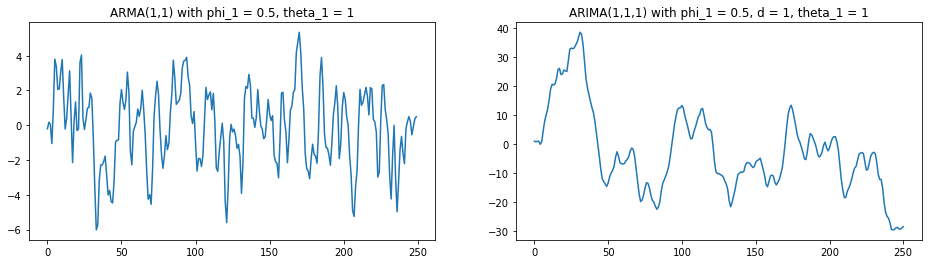

In [81]:
np.random.seed(12345)
from statsmodels.tsa.arima_model import unintegrate, unintegrate_levels
arma_1 = gen_arma_samples (ar = [1,-.5], ma = [1,1], nobs = 250) # 차분한 값이 ARMA (1,1)을 따름
arima_1 = unintegrate(arma_1, [1]) # unintegrate: 차분한 값을 다시 원상 복귀
fig,ax = plt.subplots(1,2, figsize = (16,4))
ax[0].plot(arma_1)
ax[0].set_title("ARMA(1,1) with phi_1 = 0.5, theta_1 = 1")
ax[1].plot(arima_1)
ax[1].set_title("ARIMA(1,1,1) with phi_1 = 0.5, d = 1, theta_1 = 1")
plt.show()